In [45]:
import mysql.connector

In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

con=mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="mani8292",
    database="proj")



df =pd.read_sql_query("Select * from studmar",con)
#Display the top 5 dataset
df.head(5)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [47]:
## print shape of dataset with rows and columns
df.shape

(10, 11)

In [48]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null object
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: int64(8), object(3)
memory usage: 960.0+ bytes


its show the number of rows, number of columns ,data types information,Memory usage,number of null values in each columns

In [49]:
#show the datapyes
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [50]:
#check the variance
df.var()

Maths        378.711111
Physics      426.900000
Chemistry    196.011111
English      208.900000
Biology      728.900000
Economics    214.011111
History      208.900000
Civics       642.277778
dtype: float64

after seen the  dataset there is no case of low variance 

In [51]:
#check the skewness in the data
df.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [52]:
#five point of the summary
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [53]:
pip install pandas_profiling[notebook,html]

Note: you may need to restart the kernel to use updated packages.


### Pandas Profiling to get the overview of the data

In [54]:
import pandas_profiling as pp
pp.ProfileReport(df)

### Handling the Missing Values

In [55]:
#To check the missing values in the dataset
df.isnull().values.any()

False

its show that there are no null values(missing values)

In [56]:
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [57]:
#percentage of missing values in each variables
df.isnull().sum()/len(df)*100

Name         0.0
Gender       0.0
DOB          0.0
Maths        0.0
Physics      0.0
Chemistry    0.0
English      0.0
Biology      0.0
Economics    0.0
History      0.0
Civics       0.0
dtype: float64

its shows that the percentage of null values(missing values) of each columns of dataset 

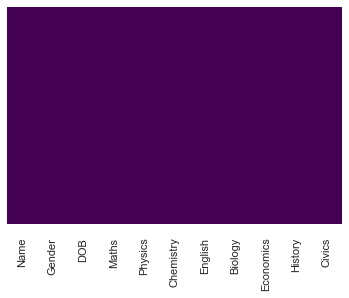

In [58]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
# Analysing the Gender

# To get the number of Male and feamal person

df.groupby('Gender').size()

Gender
F    5
M    5
dtype: int64

The Data is not biased towards male & female it's equal.



In [60]:
sns.set(color_codes=True)
import matplotlib.pyplot as plt

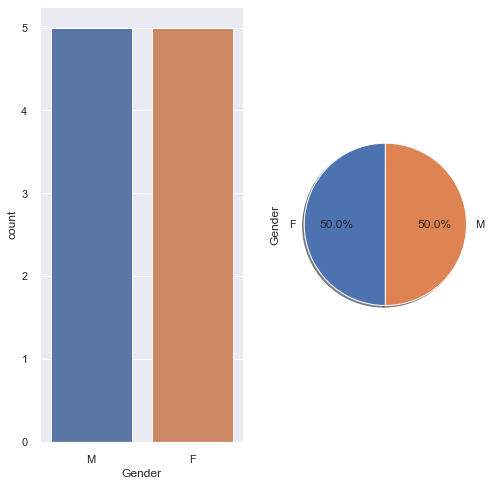

In [61]:
# countplot----Plot the frequency of the Outcome
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['Gender'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'F', 'M'

df.Gender.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)


### Observation

The first plot shows the count values of the Gender and second pieplot shows that 50% people are Male and 50% people are Female in class.

## Univariate Analysis 

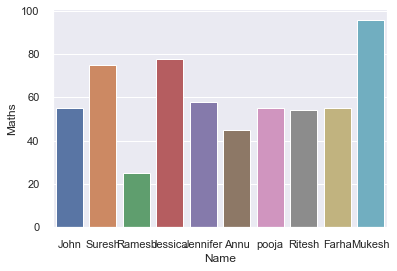

In [62]:
sns.barplot(df['Name'], df['Maths'])

### Observation(s):

Here clearly visible Mulesh getting a higest marks(92) and Ramesh getting a Lowest Marks in 'Maths'

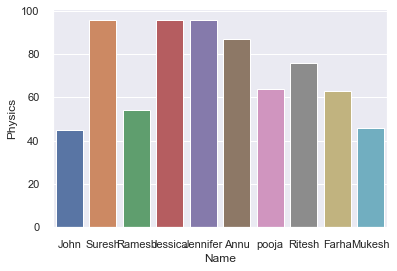

In [63]:
sns.barplot(df['Name'],df['Physics'])

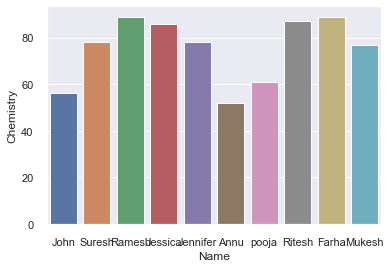

In [64]:
sns.barplot(df['Name'],df['Chemistry'])

### Observation(s):

In Chemistry four  student are getting a more than 80%.
to student getting a below a 60%.

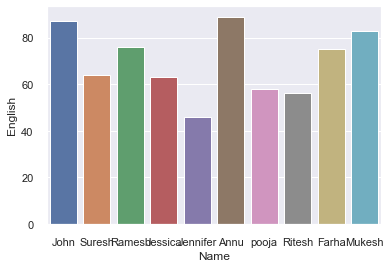

In [65]:
sns.barplot(df['Name'],df['English'])

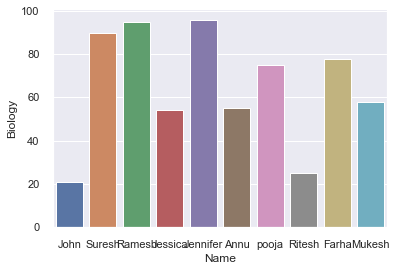

In [66]:
sns.barplot(df['Name'],df['Biology'])

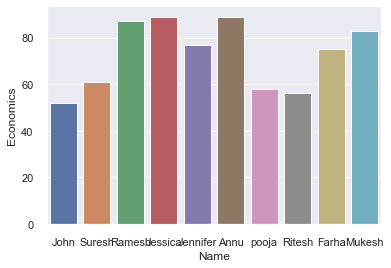

In [67]:
sns.barplot(df['Name'],df['Economics'])

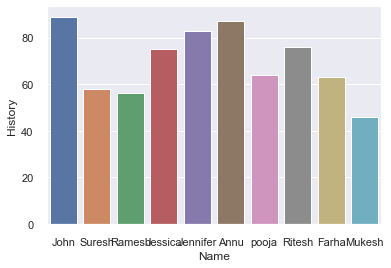

In [68]:
sns.barplot(df['Name'],df['History'])

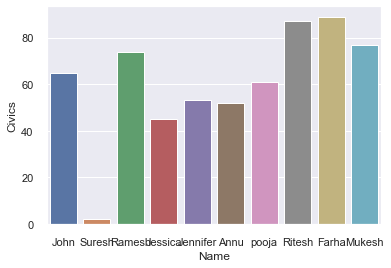

In [69]:
sns.barplot(df['Name'],df['Civics'])

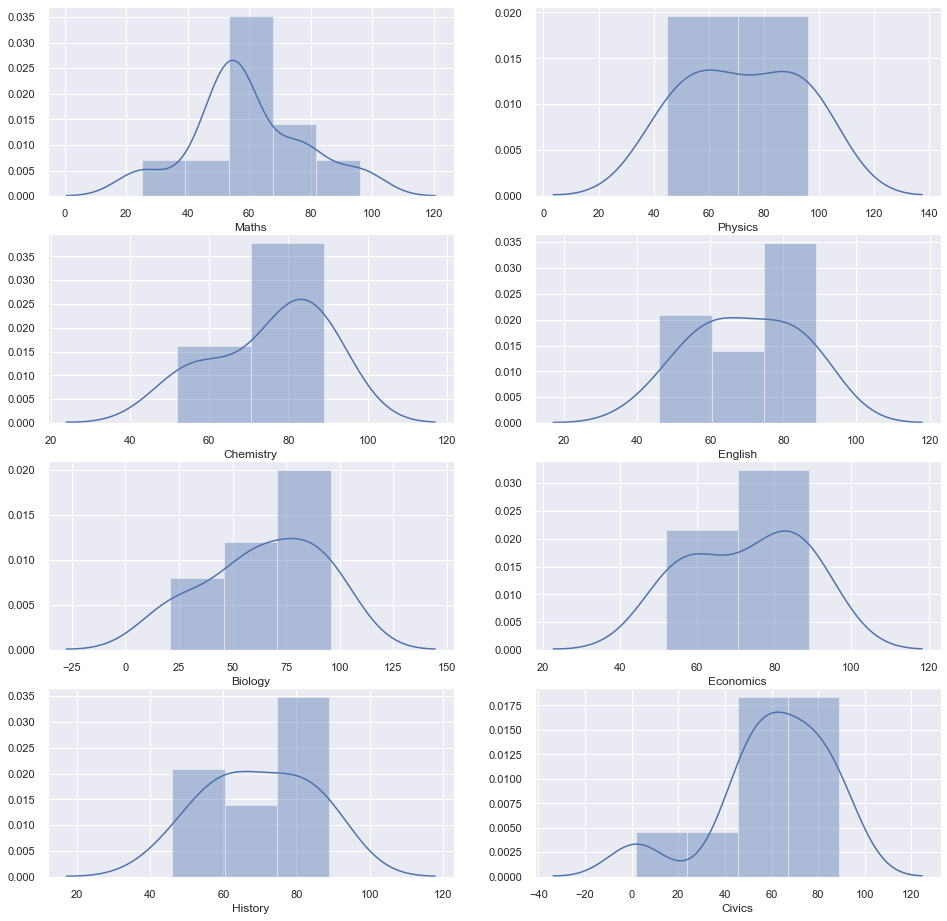

In [70]:
fig,ax2=plt.subplots(4,2,figsize=(16,16))
sns.distplot(df['Maths'],ax=ax2[0][0])
sns.distplot(df['Physics'],ax=ax2[0][1])
sns.distplot(df['Chemistry'],ax=ax2[1][0])
sns.distplot(df["English"],ax=ax2[1][1])
sns.distplot(df['Biology'],ax=ax2[2][0])
sns.distplot(df['Economics'],ax=ax2[2][1])
sns.distplot(df['History'],ax=ax2[3][0])
sns.distplot(df['Civics'],ax=ax2[3][1])

### Observation(s):

The plots show that Maths, Physics, English,History are normally distributed.Chemistry,Biology,Economics,Civics  are leftly skewed.

## Analysis of 'Maths' Marks

[0.1 0.  0.1 0.  0.5 0.  0.  0.2 0.  0.1]
[25.  32.1 39.2 46.3 53.4 60.5 67.6 74.7 81.8 88.9 96. ]


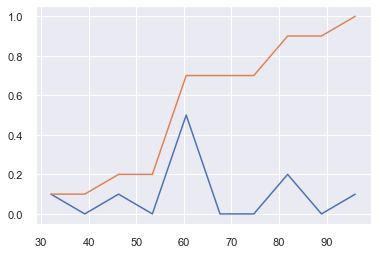

In [71]:
#Plot CDF of Maths
counts, bin_edges = np.histogram(df['Maths'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)#cumsum is basicly cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

### Obsetvation

Here Blue line is PDF and Orange line is CDF.In this graph Y-axisis probability and X-axis is "Maths" data.
In PDF Grapg hights represent how many ponits there in this range.
Here 50% of points typicaly have there maths between 53% to 65%.
In CDF Graph shows that there are 70% of student People have Maths <=70.

## Analysis of 'Physics' Marks

[0.2 0.1 0.  0.2 0.  0.  0.1 0.  0.1 0.3]
[45.  50.1 55.2 60.3 65.4 70.5 75.6 80.7 85.8 90.9 96. ]


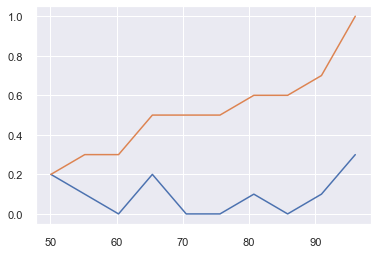

In [72]:
counts, bin_edges = np.histogram(df['Physics'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#Compute the CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

## Analysis of "Chemistry" Marks

[0.2 0.1 0.  0.2 0.  0.  0.1 0.  0.1 0.3]
[52.  55.7 59.4 63.1 66.8 70.5 74.2 77.9 81.6 85.3 89. ]


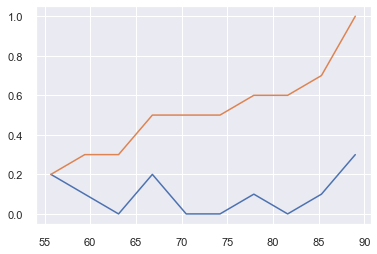

In [73]:
Counts, bin_edges = np.histogram(df['Chemistry'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute the CDF
cdf = np.cumsum([pdf])
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();


## Analysis of 'English' Marks

[0.1 0.  0.2 0.1 0.1 0.  0.2 0.  0.1 0.2]
[46.  50.3 54.6 58.9 63.2 67.5 71.8 76.1 80.4 84.7 89. ]


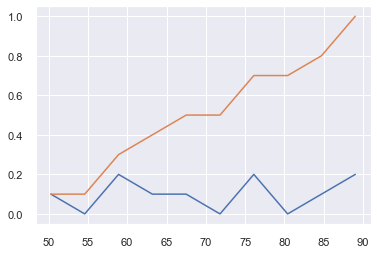

In [74]:
counts, bin_edges = np.histogram(df['English'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#Compute the CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

[0.2 0.  0.  0.  0.3 0.  0.  0.2 0.  0.3]
[21.  28.5 36.  43.5 51.  58.5 66.  73.5 81.  88.5 96. ]


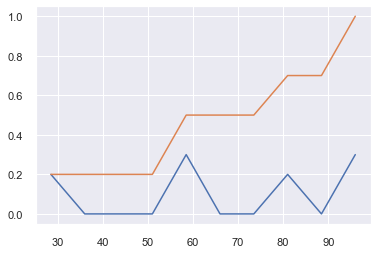

In [75]:
counts, bin_edges = np.histogram(df['Biology'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#Compute the CDF
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

[0.1 0.2 0.1 0.  0.  0.  0.2 0.  0.1 0.3]
[52.  55.7 59.4 63.1 66.8 70.5 74.2 77.9 81.6 85.3 89. ]


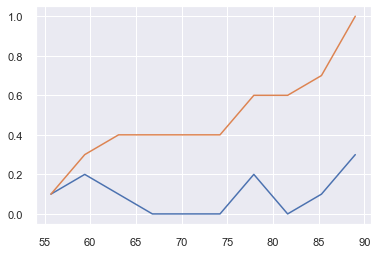

In [76]:
counts, bin_edges = np.histogram(df['Economics'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


#compute the CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

[0.1 0.  0.2 0.1 0.1 0.  0.2 0.  0.1 0.2]
[46.  50.3 54.6 58.9 63.2 67.5 71.8 76.1 80.4 84.7 89. ]


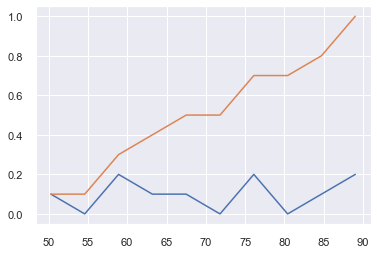

In [77]:
counts, bin_edges = np.histogram(df['History'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute the CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

## Analysis of "Civics" Marks

[0.1 0.  0.  0.  0.1 0.2 0.1 0.1 0.2 0.2]
[ 2.  10.7 19.4 28.1 36.8 45.5 54.2 62.9 71.6 80.3 89. ]


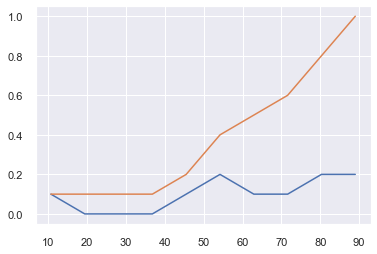

In [78]:
counts, bin_edges = np.histogram(df['Civics'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)



#computes the CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

In [79]:
pd.crosstab(df['Name'],df['DOB'])

DOB,02-09-1989,04-05-1987,05-04-1988,12-08-1990,25-05-1989
Name,,,,,
Annu,0,0,1,0,0
Farha,0,0,0,1,0
Jennifer,1,0,0,0,0
Jessica,0,0,0,1,0
John,0,0,1,0,0
Mukesh,1,0,0,0,0
Ramesh,0,0,0,0,1
Ritesh,0,0,0,0,1
Suresh,0,1,0,0,0


In [80]:
# corrlation matrix
cor=df.corr()
cor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


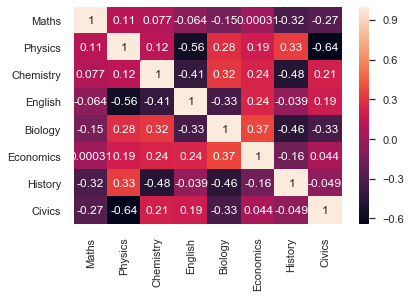

In [81]:
# correlation plot---heatmap
sns.heatmap(cor,annot=True)

### Outliers

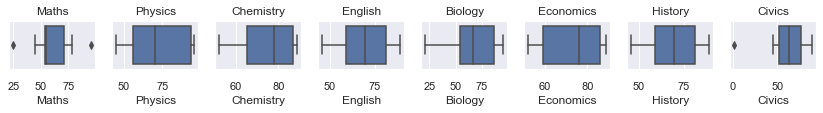

In [82]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(3,11):
    data3=plt.subplot(3,11,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

### Observation

The plots shows the Outliers present in the dataset.
Maths, Civics have outliers.It is clearly visible in the boxplots

### Bivariate Analysis

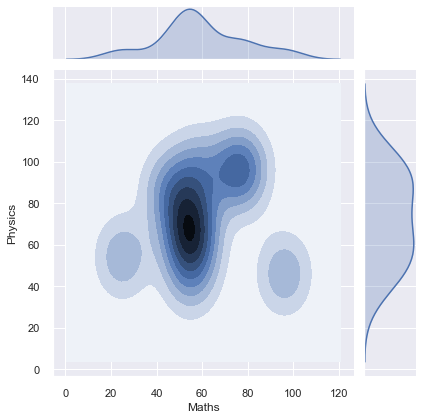

In [83]:
#2D contour probablity- density plot
sns.jointplot(x="Maths",y='Physics',data=df,kind='kde')
plt.show();

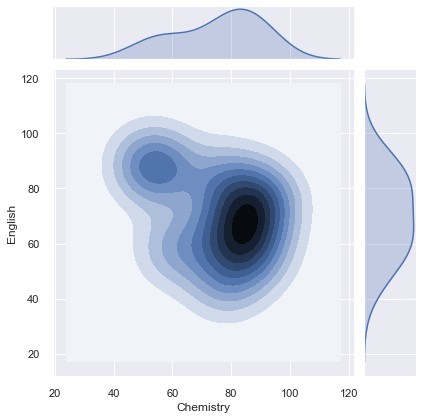

In [84]:
sns.jointplot(x="Chemistry",y='English',data=df,kind='kde')

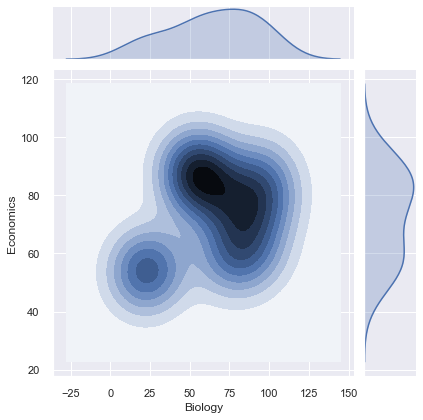

In [85]:
sns.jointplot(x='Biology', y='Economics',data=df,kind='kde')
plt.show();

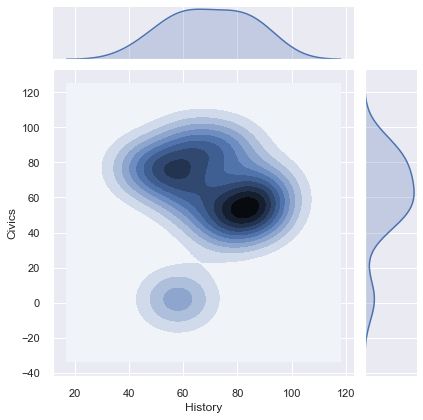

In [86]:
sns.jointplot(x='History',y='Civics',data=df,kind='kde')
plt.show();

### Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D67FCC0>,
      dtype=object)

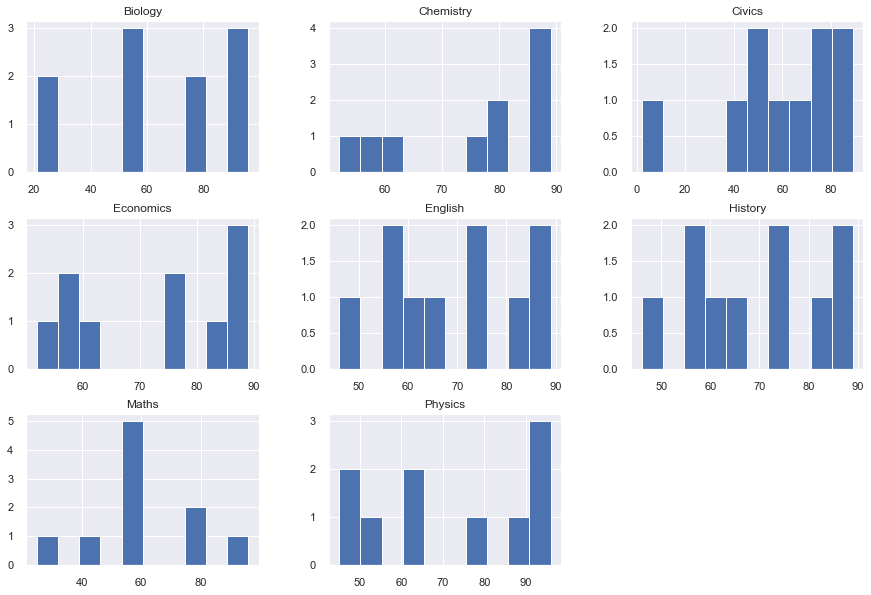

In [87]:
df.hist(figsize=(15,10))

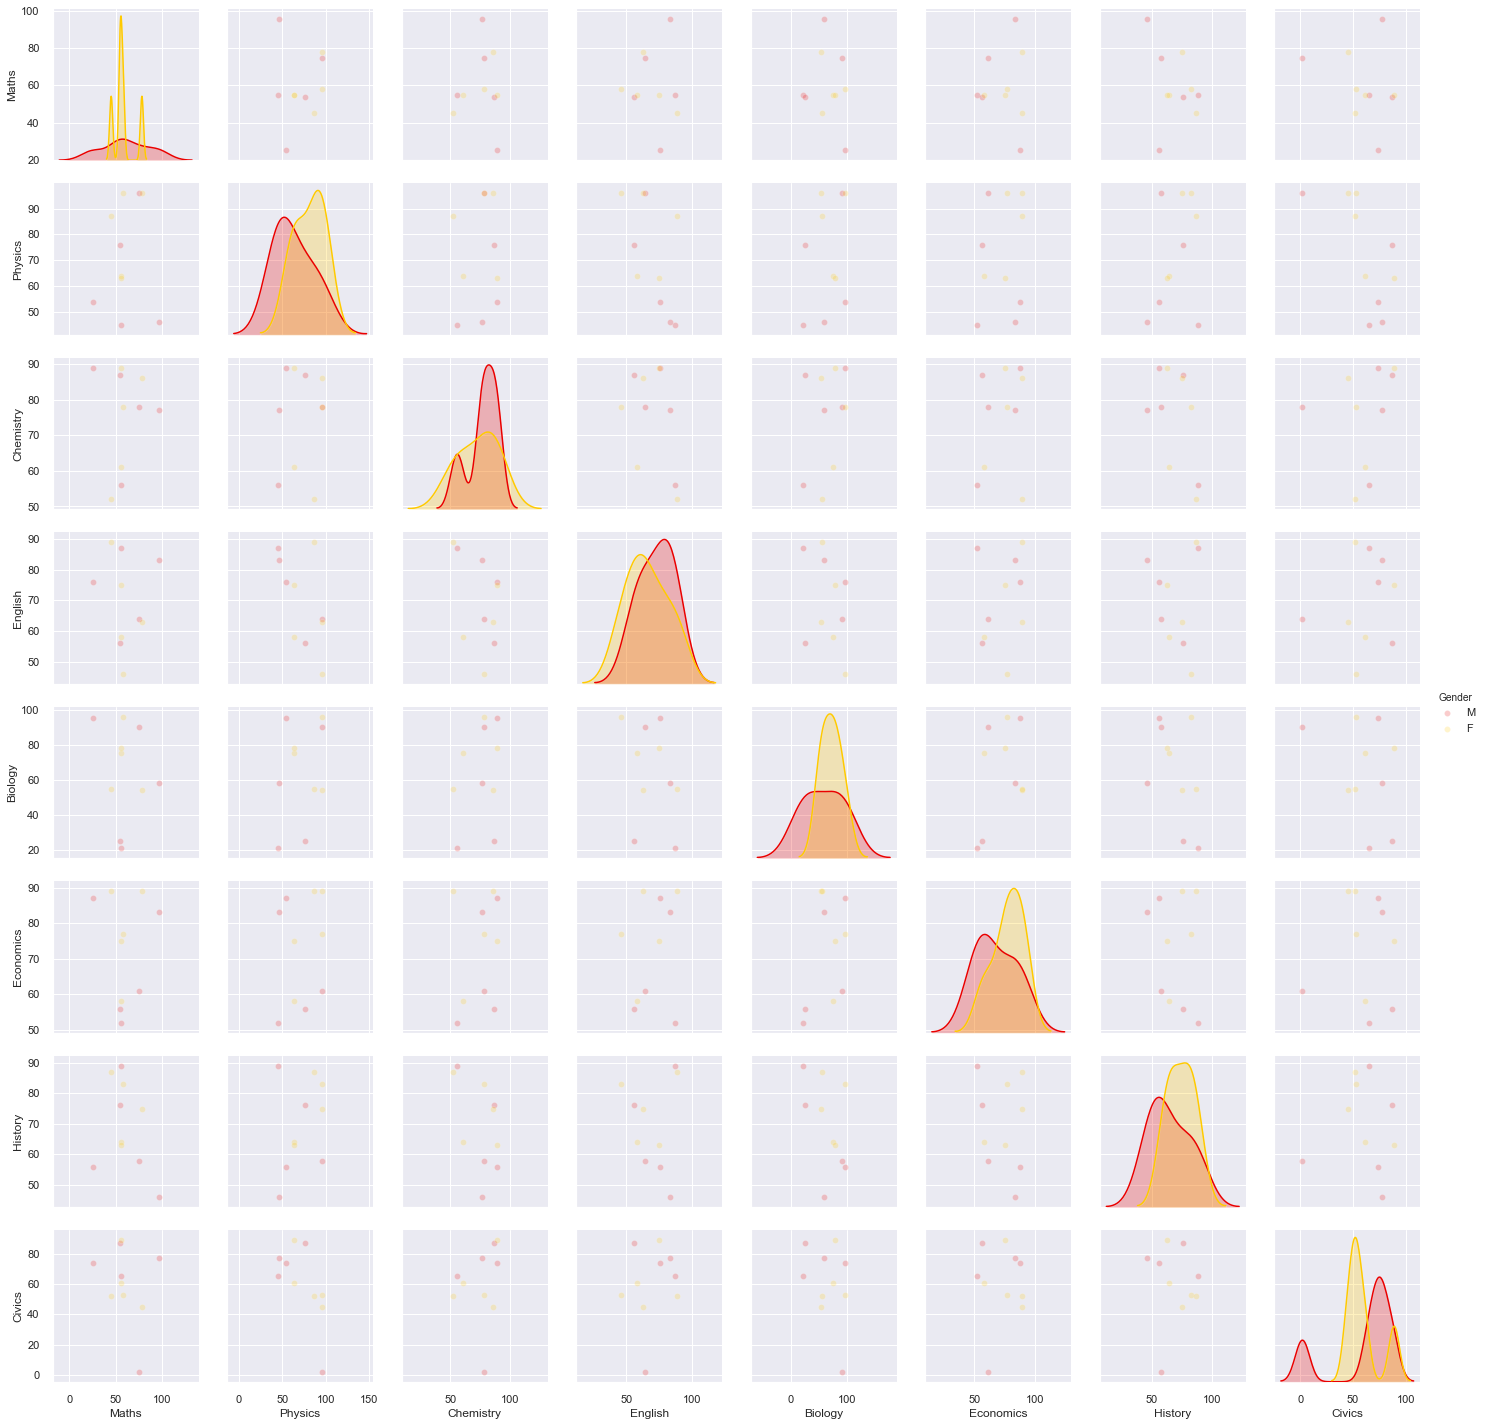

In [88]:
sns.pairplot(data=df,hue='Gender',plot_kws={'alpha':0.2},palette='hot')